In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/summeranalytics2020/Sample_submission.csv
/kaggle/input/summeranalytics2020/test.csv
/kaggle/input/summeranalytics2020/train.csv


## Reading the data

In [2]:
train=pd.read_csv('/kaggle/input/summeranalytics2020/train.csv')
test=pd.read_csv('/kaggle/input/summeranalytics2020/test.csv')

## Importing the useful libraries for visualization

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
pd.options.display.max_columns=80

In [5]:
train.head()

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


In [6]:
train.isnull().sum()

Id                         0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

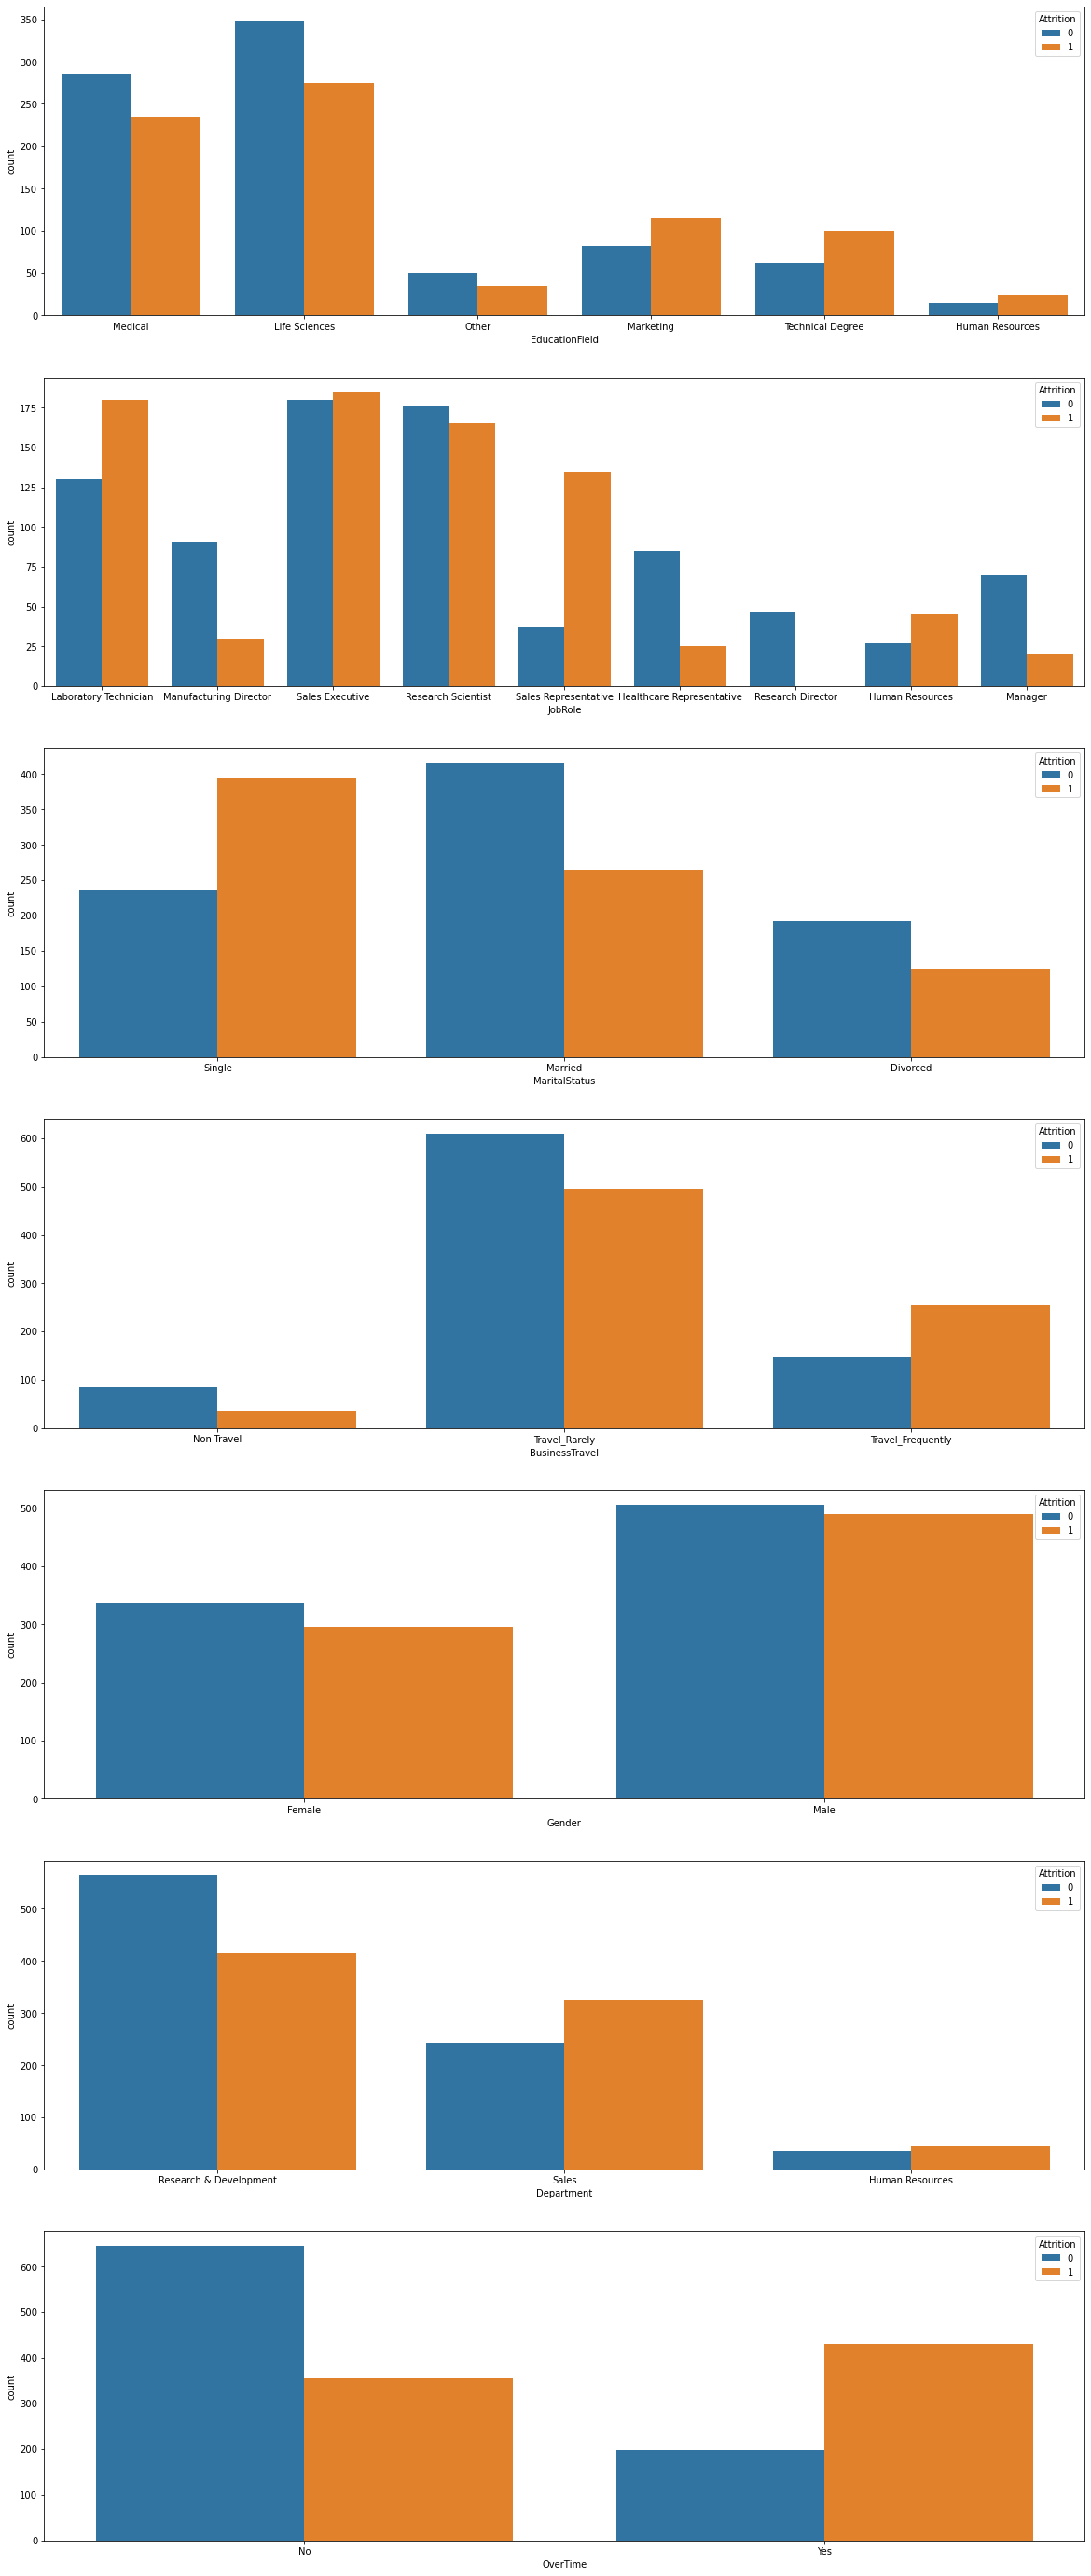

In [7]:
object_cols=list(set(train.select_dtypes(include='object').columns))
plt.figure(figsize=(20, 50))
for i in range(len(object_cols)):
    plt.subplot(7,1,i+1)
    sns.countplot(train[object_cols[i]], hue = train.Attrition)

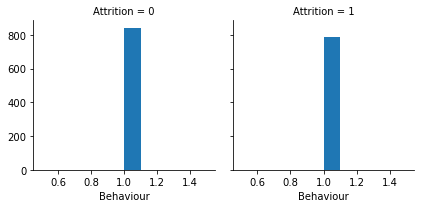

In [8]:
f=sns.FacetGrid(train,col="Attrition")
f.map(plt.hist,"Behaviour")

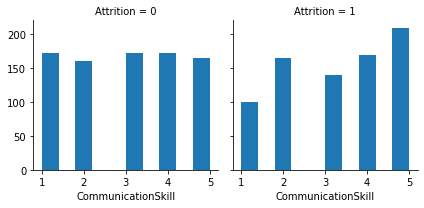

In [9]:
f=sns.FacetGrid(train,col="Attrition")
f.map(plt.hist,"CommunicationSkill")

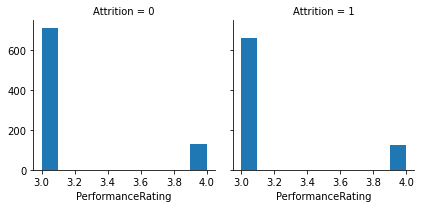

In [10]:
f=sns.FacetGrid(train,col="Attrition")
f.map(plt.hist,"PerformanceRating")

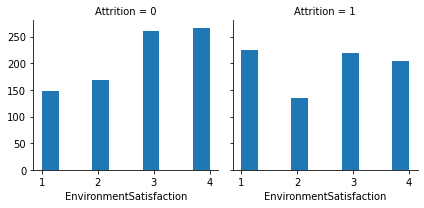

In [11]:
f=sns.FacetGrid(train,col="Attrition")
f.map(plt.hist,"EnvironmentSatisfaction")

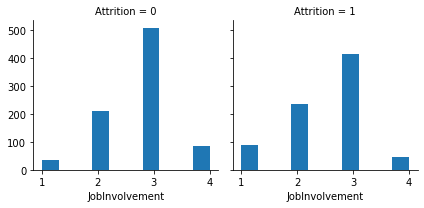

In [12]:
f=sns.FacetGrid(train,col="Attrition")
f.map(plt.hist,"JobInvolvement")

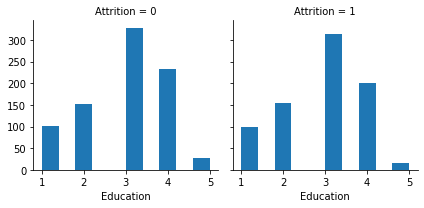

In [13]:
f=sns.FacetGrid(train,col="Attrition")
f.map(plt.hist,"Education")

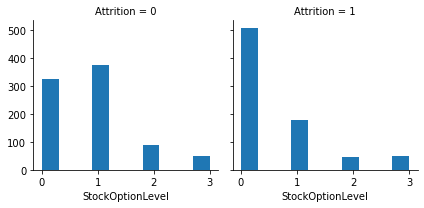

In [14]:
f=sns.FacetGrid(train,col="Attrition")
f.map(plt.hist,"StockOptionLevel")

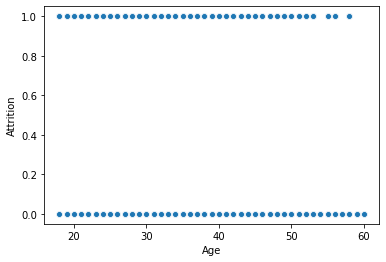

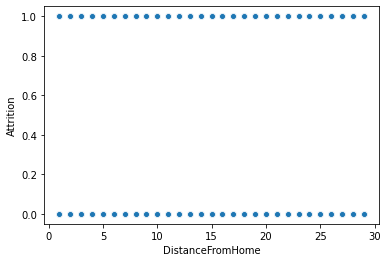

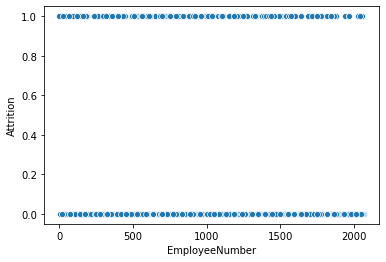

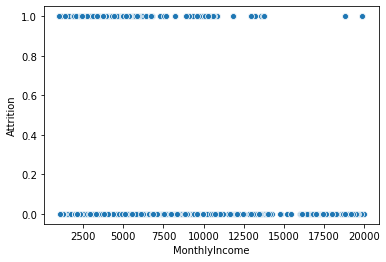

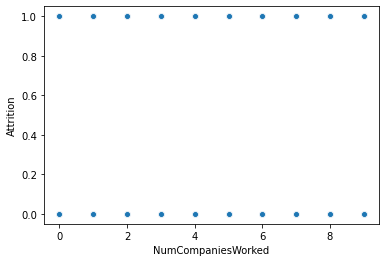

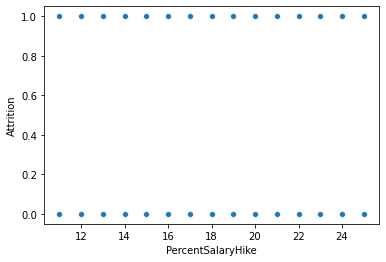

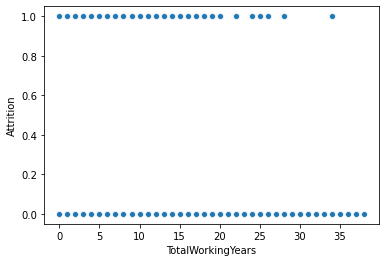

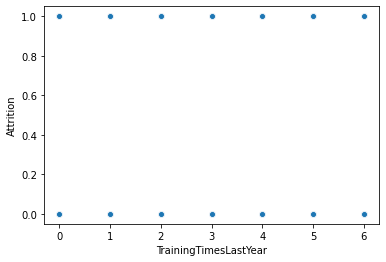

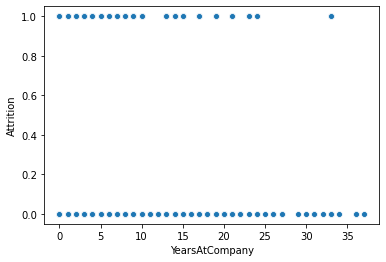

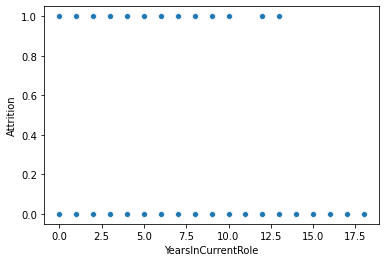

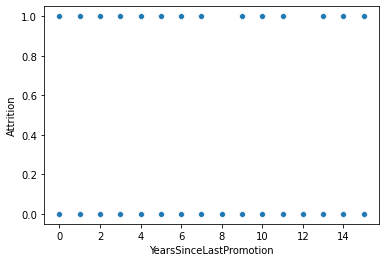

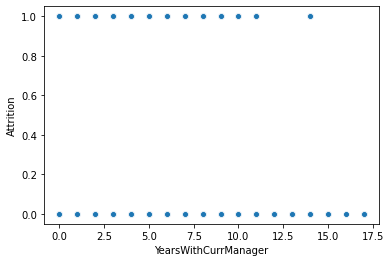

In [15]:
num_cols=['Age', 'DistanceFromHome', 'EmployeeNumber', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for i in range(len(num_cols)):
    sns.scatterplot(x=train[num_cols[i]],y=train.Attrition)
    plt.show()

In [27]:
from scipy.stats import skew

skew_f=train.apply(lambda x:skew(x)).sort_values(ascending=False)
highest_skew=skew_f[skew_f>0.5]
highest_skew

Human_resources_ed           6.142083
Research Director            5.627435
Human Resources              4.433665
Human_resources_dept         4.141392
Other                        4.025920
Manager                      3.891967
Healthcare Representative    3.445644
Non-Travel                   3.262858
Manufacturing Director       3.245741
Technical Degree             2.675797
Sales Representative         2.565784
Marketing                    2.324140
YearsSinceLastPromotion      2.069823
YearsAtCompany               1.941291
PerformanceRating            1.902310
Laboratory Technician        1.576965
MonthlyIncome                1.559894
Divorced                     1.541897
Research Scientist           1.427988
Sales Executive              1.322599
StockOptionLevel             1.207078
Travel_Frequently            1.169907
TotalWorkingYears            1.168668
YearsInCurrentRole           1.114529
YearsWithCurrManager         1.014113
NumCompaniesWorked           0.985050
DistanceFrom